# 주성분 분석

> 여러 개의 독립변수들을 잘 설명해줄 수 있는 주된 성분을 추출하는 기법.(차원축소 기법)

- 변수의 수를 줄임으로써 모형을 간단하게 만들 수 있고, 분석 결과를 효과 적으로 해석 할 수 있다. 
- 모두 등간 척도 or 비율척도로 측정한 양적 변수여야하고, 관측치들이 서로 독립 + 정규분포를 이루고 있어야한다. 

- 데이터 공간에 위치하는 점들의 분산을 최대한 보존하는 축을 통해 차원을 축소


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo


### 데이터 불러오기 및 확인

In [3]:
# 데이터 불러오기 
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### 데이터 정규화 적용

In [4]:
### 데이터 스케일 정규화


# 차원축소 할 칼럼만 선택
y = df[['Type']]
df1 = df.drop('Type',axis=1)

## 데이터 정규화 적용
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df1)

## 칼럼명 결함
df_minmax = pd.DataFrame(df_minmax,columns=df1.columns)

df_minmax.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


### 9개의 주성분 생성 후 설명력 확인

In [5]:
# 주성분 개수 설정  
pca = PCA(n_components=9)
df_pca = pca.fit_transform(df_minmax)

## 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data = df_pca, columns=['C1',"C2",'C3',"C4",'C5',"C6",'C7',"C8","C9"])

# 주성분의 설명력 확인
np.round_(pca.explained_variance_ratio_,3)

array([0.454, 0.18 , 0.126, 0.098, 0.069, 0.042, 0.026, 0.004, 0.   ])

### 2개의 주성분 생성

In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_minmax)

## 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(df_pca,columns=["C1",'C2'])
df_pca.head()

,C1,C2
0,-0.402106,0.032707
1,-0.206320,-0.144705
2,-0.188617,-0.194854
3,-0.237208,-0.097064
4,-0.223972,-0.121779


### 주성분에 따른 종속변수 시각화

In [7]:
y.value_counts()

Type
2       76
1       70
7       29
3       17
5       13
6        9
Name: count, dtype: int64

<Axes: xlabel='C1', ylabel='C2'>

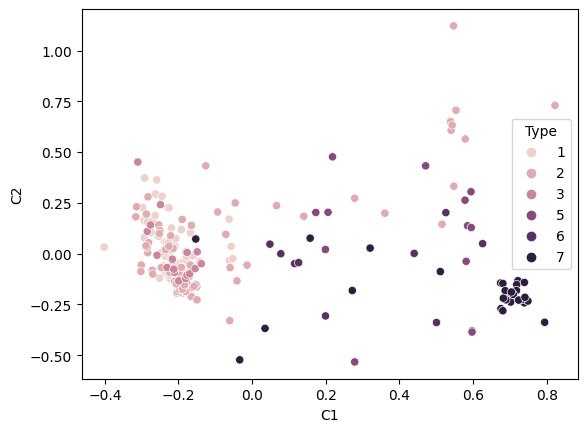

In [14]:
# 주성분에 따른 종속변수 시각화

# 주성분 테이블에 종속변수 칼럼 결합
df_concat = pd.concat([df_pca,y],axis=1)

## 산점도 시각화 
sns.scatterplot(data=df_concat,x="C1",y='C2',hue='Type')

### Type7은 C1로 0.6~0.8정도 설명가능 C2로 -0.5 ~ 0 정도 설명가능...? 


## 공통요인분석 (CFA)

> 공통 분산만을 토대로 요인을 추출하는 것이 CFA, 전체 분산을 사용하는 것이 주성분 분석

- 상관성이 높은 변수들을 묶어 잠재된 몇개의 변수를 찾는다. 
- PCA는 모든 독립변수들의 총 분산을 기반으로 요인을 추출 -> 전체변수를 가장 잘 설명해주는 순으로 주성분의 우위가 결정

- 반면 CFA는 변수들간의 공분산만을 기분으로 하여 요인을 추출 -> 기본적으로 종류가 다른 변수를 만들어 내는것이 목적 

> PCA나 CFA와 같은 요인분석을 하기 위해서는 독립변수들 간의 상관성이 요인분석에 적합한지 검증해야 한다. ex) 바틀렛test, KMO검정( 변수들간의 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값을 통계적으로 산출하는 검정 )

- 고유치는 요인이 설명해주는 분산의 양 ( 1보다 큰 요인만 선택 ). 60%까지 설명해주는것까지 선택
- 스크리 플롯을 통해 엘보우 포인트까지의 요인 선택

- 요인 적재값을 통해 +-0.3이상이면 변수와 요인에 유의성 존재한다고 봄, 0.5이상이면 중요한 변수

### 데이터 불러오기 및 확인

In [18]:
# 데이터 불러오기

df = pd.read_csv('nba2021_advanced.csv')
df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


### 변수 선택 및 데이터 스케일 정규화

In [21]:
# 변수 선택 및 데이터 스케일 정규화

# 요인 분석할 칼럼만 선택
df1 = df.drop(['Player','Pos','Tm','Age'],axis=1)

# 데이터 정규화
scaler = MinMaxScaler()
df_minmax = scaler.fit_transform(df1)

# 칼럼명 결합 
df_minmax = pd.DataFrame(df_minmax,columns=df1.columns)

df_minmax.head()

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0.931034,0.369427,0.703518,0.399333,0.000,0.202850,0.300000,0.365989,0.550000,0.143158,...,0.161,0.450382,0.245902,0.318182,0.239437,0.836054,0.688192,0.552147,0.677419,0.146341
1,0.172414,0.013649,0.427136,0.083333,0.250,0.000000,0.000000,0.336414,0.335714,0.282105,...,0.000,0.450382,0.180328,0.045455,0.098592,0.587075,0.452030,0.245399,0.402458,0.146341
2,0.896552,0.689718,0.713568,0.394667,0.006,0.148856,0.482857,0.332717,0.625000,0.212632,...,0.201,0.274809,0.393443,0.272727,0.352113,0.841497,0.738007,0.503067,0.706605,0.219512
3,0.862069,0.792539,0.798995,0.427333,0.015,0.175853,0.194286,0.428835,0.550000,0.587368,...,0.162,0.575064,0.573770,0.636364,0.619718,0.900680,0.793358,0.687117,0.798771,0.536585
4,0.586207,0.434941,0.704774,0.361333,0.298,0.034871,0.091429,0.258780,0.300000,0.240000,...,0.064,0.516539,0.229508,0.272727,0.211268,0.818367,0.745387,0.503067,0.712750,0.219512


### 바틀렛 테스트


In [24]:
chi_square_value,p_value = calculate_bartlett_sphericity(df_minmax)

chi_square_value,p_value


(20174.082695118377, 0.0)

> 0.05보다 작다 -> 변수들 간 상관관계가 있다.

### KMO 검정

In [25]:
# KMO 검정

kmo_all,kmo_test = calculate_kmo(df_minmax)
kmo_test

C:\Users\hamin\AppData\Roaming\Python\Python39\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7017388419159649

> 0.7 -> 약간높음 : 변수 그룹간 상관관계 약간 높음

### 전체 요인 적재 값 확인

In [26]:
# 전체 요인 적재 값 확인
fa = FactorAnalyzer(n_factors=30,rotation=None)
fa.fit(df_minmax)
ev,v = fa.get_eigenvalues()
np.round(ev,2)

array([7.91, 3.53, 2.25, 1.59, 1.45, 1.05, 0.86, 0.67, 0.59, 0.57, 0.45,
       0.37, 0.24, 0.17, 0.11, 0.08, 0.07, 0.03, 0.01, 0.  , 0.  , 0.  ])

### Scree Plot 


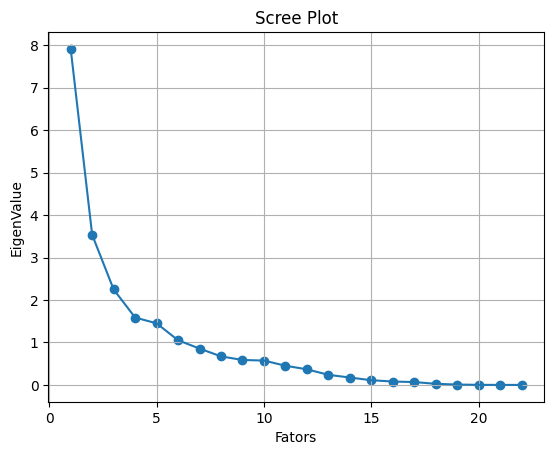

In [37]:
# Scree Plot 
plt.scatter(range(1,df_minmax.shape[1]+1),ev)
plt.plot(range(1,df_minmax.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Fators')
plt.ylabel("EigenValue")
plt.grid()
plt.show()
plt.close()

### 요인과 변수 간 요인 적재 값 확인


In [38]:
# 요인과 변수 간 요인 적재 값 확인

fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df_minmax)
factor_loadings = pd.DataFrame(fa.loadings_,index=df_minmax.columns)
factor_loadings

,0,1,2,3
G,0.280363,-0.120974,0.823695,0.054468
MP,0.235239,-0.114616,0.820694,0.349032
PER,0.832268,0.305573,0.147761,0.411650
TS%,0.746473,0.103235,0.151836,0.069871
3PAr,-0.015289,-0.593922,0.004644,-0.180311
FTr,0.087057,0.356382,-0.173463,0.112161
ORB%,0.042655,0.785599,-0.047214,-0.058840
DRB%,0.105775,0.711622,0.131665,-0.009666
TRB%,0.076869,0.971609,0.092116,-0.049174
AST%,0.072484,-0.176681,0.082553,0.571263


### 요인과 변수 간 요인 적재 값 시각화

<Axes: >

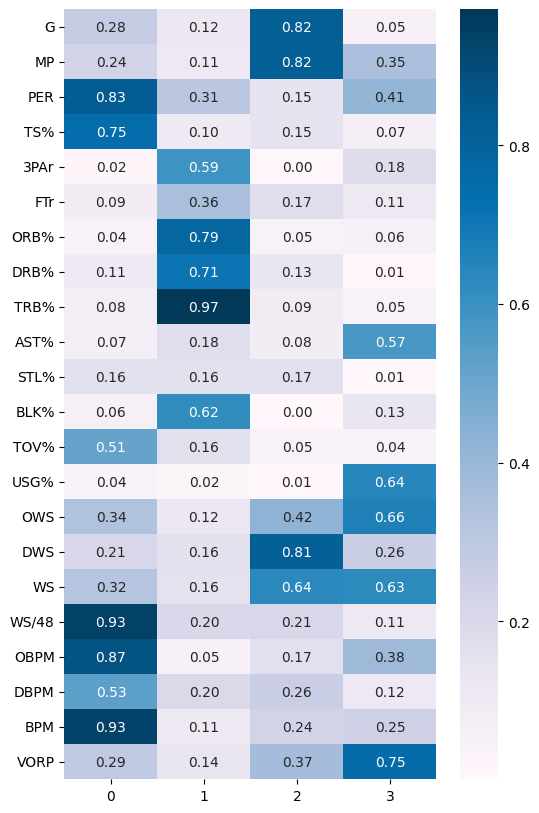

In [39]:
# 요인과 변수 간 요인 적재 값 시각화

plt.figure(figsize=(6,10))
sns.heatmap(abs(factor_loadings),cmap='PuBu',annot=True,fmt='.2f')


## 다중공선성 해결과 섀플리 밸류 분석

> 다중공선성이란 독립변수들 간의 상관관계가 높은 현상을 뜻한다. -> 두 개 이상의 독립변수가 서로 선형적인 관계를 나타낼때.

### 다중공선성을 판별하는 기준

1. 회귀분석 모델을 실행하기 전에 상관분석을 통해 독립변수 간 상관성이 높은 변수 찾는 방법, 하지만 변수만으면 힘듦
2. 회귀분석 결과에서 R-squared 값은 크지만 회귀계수에 대한 t값이 낮다면 다중공선성 의심해볼수있음
3. VIF을 통해 다중공선성 판단

### 다중공선성 해결 방법
1.  VIF 값이 높은 변수들 중에서 종속변수와의 설명력이 가장 낮은 변수를 제거하고 다시 VIF값을 확인하는 것을 반복.(가장 기본)
2. 표본관측치를 추가적으로 확보해 다중공선성 완화(잘안씀)
3. 변수를 가공하여 변수 간의 상관성을 줄이는 방법(로그,표준화,정규화) (현실적)
4.  주성분 분석을 통한 변수 축약, 해석이 어려워지는 단점.
5. 변수 선택 알고리즘. (전진선택법, 후진제거법, 단계적 선택법)

#### 섀플리 밸류 분석

- 독립변수가 종속변수의 설명력에 기여하는 순수한 수치를 계산하는 방법

## 데이터 마사지와 블라인드 분석

### 데이터 마사지 
> 데이터 마사지란 데이터 분석 결과가 예상하거나 의도한 방향과 다를 때 데이터의 배열을 수정하거나 관점을 바꾸는 등 동일한 데이터라도 해석이 달라질 수 있도록 유도하는 것임.

#### 데이터 마사지 방법
 - 편향된 데이터 전처리 
  > 이상치나 결측값 등의 전처리를 분석가가 의도하는 방향에 유리하도록 끌고 가는것.
 - 매직 그래프 사용
 > 그래프의 레이블 간격이나 비율을 왜곡하여 수치의 차이를 식제보다 크거나 작에 인식하도록 유도
 - 분모 바꾸기 등 관점 변환
 - 의도적인 데이터 누락 및 가공
 > 분석가가 원하는 방향과 반대되는 데이터를 의도적으로 누락 or 다른 수치와 결합
 - 머신러닝 모델의 파라미터 값 변경 및 연산반복
 - 심슨의 역설

 ### 블라인드 분석
 > 데이터 마사지에 의한 왜곡을 방자하기 위해 사용하는 방법, 확증 편향에 의한 오류를 최소화 하기 위한 방법

 > 블라인드 분석은 기존에 분석가가 중요하다고 생각했던 변수가 큰 의미가 없는 것으로 결과가 나왔을 때 의미부여 하거나 그 변수에 집착하여 해석에 유리하도록 변수를 가공하게 되는 실수를 방지하는 목적이 크다


## Z-test, T-test

> 집단 내 혹은 집단 간 평균값의 차이가 통계적으로 유의미한지 알아보는 검정.
- Z-test와 T-test는 두 집단간 평균차이 혹은 비율 차이 분석, ANOVA는 두 집단 이상일 경우 사용
- Z-test와 T-test의 조건 
    1. 연속형 변수
    2. 정규분포
    3. 등분산성
- 표본의 크기가 30 이상이면 중심극한정리에 의해 정규분포를 따른다고 볼 수 있으므로 Z-test 사용가능 
- T-test는 표본의 크기가 30 미만이라 정규분포를 가정할 수 없을 떄 사용

![Alt text](image.png)



### Z-test와 T-test 실습

In [18]:
# 필요한 패키지 가져오기


from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy.stats import  ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


### 데이터 불러오기 및 확인

In [2]:
df = pd.read_csv('Golf_test.csv')

## 데이터 샘플 확인
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


### 골프공 타입 별 통계값 확인

In [3]:
# 골프공 타입 별 통계값 확인

df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


### 그룹별 박스플롯

c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Hamin\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


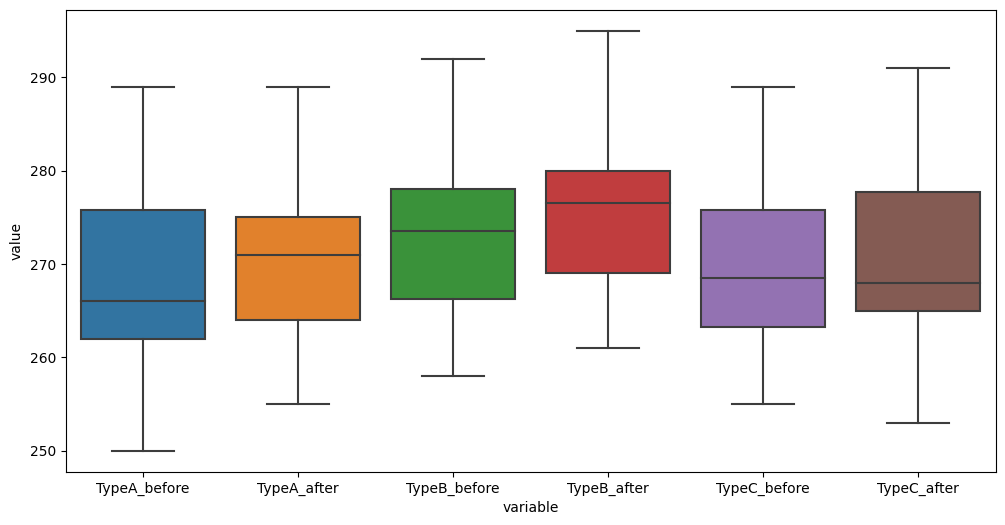

In [10]:
df2 = pd.melt(df)
df2
plt.figure(figsize=(12,6))
sns.boxplot(x='variable',y='value',data=df2)
plt.show()

### Shapiro-Wilk-Test 정규성 검정

In [15]:
# 데이터 정규성 검정

print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


TypeC_after은 정규성 만족 x

### bartlett 등분산성 검정

In [20]:
# 데이터 등분산성 검정
scipy.stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

### 대응표본 Z-test

In [24]:
# Z-test(TypeA_before,TypeA_after)

# 양측검정

print(ztest(df['TypeA_before'],x2=df['TypeA_after'],value=0,alternative='two-sided'))


(-1.2313987682249838, 0.21817375744980994)


### 독립표본 Z-test

In [25]:
# Z-test(TypeA_before,TypeA_after)

# 양측검정

print(ztest(df['TypeA_before'],x2=df['TypeB_before'],value=0,alternative='two-sided'))

# 단측검정 (왼쪽꼬리 검정)
print(ztest(df['TypeA_before'],x2=df['TypeB_before'],value=0,alternative='smaller'))

# 단측검정 (오른쪽꼬리 검정)
print(ztest(df['TypeA_before'],x2=df['TypeB_before'],value=0,alternative='larger'))



(-2.789495974658115, 0.005279015267745853)
(-2.789495974658115, 0.0026395076338729265)
(-2.789495974658115, 0.9973604923661271)


### 대응표본 T-test

In [27]:
# 대응표본 t 검정 수행

scipy.stats.ttest_rel(df['TypeA_before'],df['TypeA_after'])


TtestResult(statistic=-1.221439914972903, pvalue=0.22776376448687602, df=49)

### 독립표본 T-test검정

In [28]:
# 독립표본 T-test검정

ttest_ind(df['TypeA_before'],df['TypeB_before'],equal_var=False)

TtestResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285, df=96.23536968302767)

## ANOVA
> 세 집단 이상의 평균을 검정할 때 사용
> F분포를 사용함. F검정의 통곗값은 집단간 분산의 비율을 나타내기 때문에 분산분석이라 부름

#### 분산분석의 결과를 바탕으로 사후검증 실시 
1. Turkey의 HSD 검증 (집단의 수가 같을 때)
2. Scheffe 검증 (집단의 수가 다를 때)
### ANOVA 실습


In [30]:
## 필요한 패키지 가져오기
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd

### 데이터 불러오기 및 확인

In [31]:
# 데이터 불러오기
df = pd.read_csv('Golf_test.csv')

df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


### stats 패키지로 anova 검정


In [32]:
# stats 패키지로 anova 검정

F_statistic, pval = stats.f_oneway(df['TypeA_before'],
                                   df['TypeB_before'],
                                   df['TypeC_before'])

print(f'일원분산분석 결과 : F = {F_statistic}, p-value = {pval}')

일원분산분석 결과 : F = 4.22016943303009, p-value = 0.01651542019190324


### ols 패키지 ANOVA 검정을 위한 데이터 재구조화

In [37]:
## 데이터 재구조화
df2 = pd.melt(df)

df2 = df2.loc[(df2['variable']=='TypeA_before')|(df2['variable']=='TypeB_before')|(df2['variable']=='TypeC_before'),:]
df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


### ols 패키지로 ANOVA 검정

In [39]:
# ols 패키지 아노바 검정

model = ols('value~ C(variable)',df2).fit()
print(anova_lm(model))

                df        sum_sq     mean_sq         F    PR(>F)
C(variable)    2.0    675.453333  337.726667  4.220169  0.016515
Residual     147.0  11763.940000   80.026803       NaN       NaN


### 사후검정 수행

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0129  0.9038 9.3762   True
TypeA_before TypeC_before      1.9 0.5392 -2.3362 6.1362  False
TypeB_before TypeC_before    -3.24 0.1696 -7.4762 0.9962  False
---------------------------------------------------------------


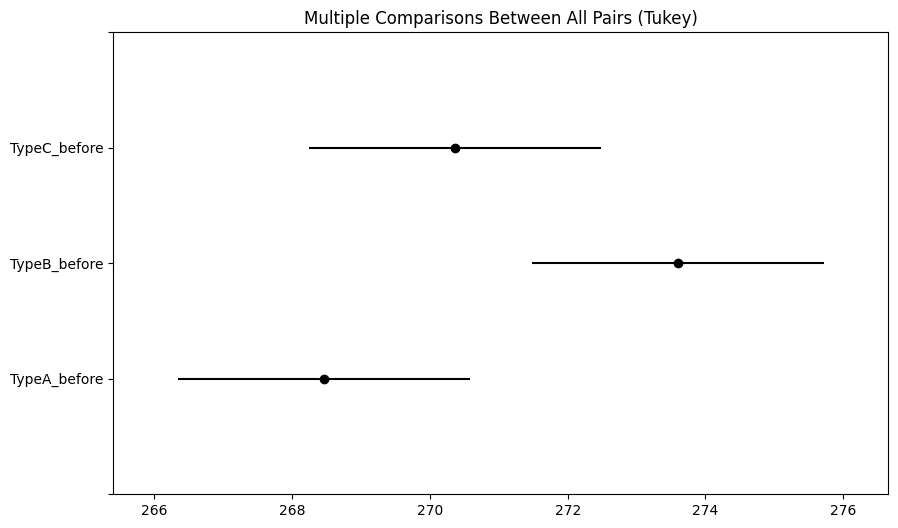

In [41]:
# 사후검정
posthoc = pairwise_tukeyhsd(df2['value'],
                            df2['variable'],
                            alpha = 0.05)

print(posthoc)
fig = posthoc.plot_simultaneous()

유의미한 차이가 있음

## 카이제곱 검정(교차분석)
> 카이제곱 검정은 교차분석이라고도 불림. 

> 범주형 변수들 간의 연관성을 분석하기 위해 결합분포를 사용

> 각각의 빈도와 비율을 통해 변수 상호 간의 독립성과 관련성을 분석


In [44]:
# 필요한 패키지 
import scipy.stats
from scipy.stats import chi2_contingency
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 
df = pd.read_csv('smoker.csv')

df.head()


,sex,smoke
0,male,Non-Smoker
1,male,Smoker
2,male,Non-Smoker
3,male,Smoker
4,male,Non-Smoker


### 성별, 흡연여부 집계


In [47]:
# 항모별 집계
df.groupby(['sex','smoke'])['smoke'].count()

sex     smoke     
female  Non-Smoker    50
        Smoker        12
male    Non-Smoker    40
        Smoker        29
Name: smoke, dtype: int64

### 카이제곱 검정용 데이터셋 가공


In [50]:
## 카이제곱 검정용 데이터셋 가공

crosstab = pd.crosstab(df.sex,df.smoke)
crosstab

smoke,Non-Smoker,Smoker
sex,,
female,50,12
male,40,29


### 성별 흡연자 수 시각화

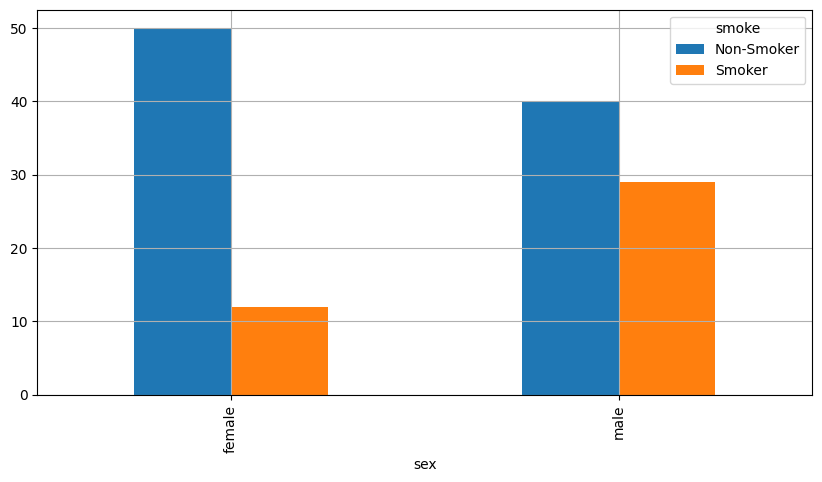

In [51]:
# 성별 흡연자 수 시각화

%matplotlib inline
crosstab.plot(kind='bar',figsize=(10,5))
plt.grid()

### 카이제곱 검정 수행


In [53]:
# 카이제곱 검정
chiresult = chi2_contingency(crosstab,correction=False)
print(f'chi square: {chiresult[0]}')
print(f'p-value: {chiresult[1]}')

chi square: 7.8081404703715105
p-value: 0.005201139711454792
